# 1. Data Generation

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import pandas as pd
import numpy as np
import pickle
import ast
import warnings
warnings.filterwarnings('ignore')

# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

In [2]:
# Universial data folder
# Inside, we have the CSV for each weather station, and the satellite imagery data
# shall be generated and stored inside a sub-folder
data_path = 'data_dir/'
csv_path = 'combined_dataset/'

In [3]:
# Get list of all CSV files
all_files = os.listdir(data_path + csv_path)

# Filter out the CSV files
csv_files = [file for file in all_files if file.endswith('.csv')]

# Now csv_files list contains all the names of csv files

# To get the full path of these csv files
csv_file_paths = [os.path.join(data_path, csv_path, file) for file in csv_files]

In [4]:
# Inspection purpose
len(csv_file_paths)

5

In [5]:
csv_file_paths

['data_dir/combined_dataset/Take_2_2006Fall_2017Spring_GOES_meteo_combined_04846.csv',
 'data_dir/combined_dataset/Take_2_2006Fall_2017Spring_GOES_meteo_combined_14815.csv',
 'data_dir/combined_dataset/Take_2_2006Fall_2017Spring_GOES_meteo_combined_14819.csv',
 'data_dir/combined_dataset/Take_2_2006Fall_2017Spring_GOES_meteo_combined_14845.csv',
 'data_dir/combined_dataset/Take_2_2006Fall_2017Spring_GOES_meteo_combined_14850.csv']

### `TO-DO`:

Change the index number for `csv_file_paths` to switch weather stations.

In [6]:
file_idx = 4

CODE 14850 refers to the city airport at Traverse City, Mi.

In [7]:
df_single_station = pd.read_csv(csv_file_paths[file_idx])

filename_curr = csv_file_paths[file_idx]
station_code = filename_curr[-9:-4]

In [8]:
# Inspection purpose
df_single_station.head(5)

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,data_usable,cloud_count,cloud_exist,...,Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F),Unnamed: 18,precip_work_zone,is_snow_precip,is_precip,does_snow_24_120
0,2006-10-01,00:00,2006-09-30,18:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, 0.0, ...",False,0,False,...,1007.20,1007.10,0.00,NC,NC,NaN,0.00,False,False,False
1,2006-10-01,01:00,2006-09-30,19:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, 0.0, 0.0025, 0.0025, 0.0, 0.0, 0.0, 0...",False,0,False,...,1007.80,1007.50,0.00,NC,NC,NaN,0.00,False,False,False
2,2006-10-01,02:00,2006-09-30,20:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, 0.0, 0.0075, 0.0, 0.0, 0.0025, 0.0, 0.0,...",False,0,False,...,1008.30,1008.10,0.00,NC,NC,NaN,0.00,False,False,False
3,2006-10-01,03:00,2006-09-30,21:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, 0.0, 0.0025, 0.0, 0.0075, 0.0, 0.005,...",False,0,False,...,M,1008.80,0.02,NC,NC,NaN,0.02,False,True,False
4,2006-10-01,04:00,2006-09-30,22:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, 0.0, 0.0, 0.0, 0.0075, 0.0, 0.0, 0.0,...",False,0,False,...,1009.50,1009.10,0.00,NC,NC,NaN,0.00,False,False,False


### Change column names for easier access.

In [9]:
# Check if 'Unnamed: 18' is in the DataFrame's columns
if 'Unnamed: 18' in df_single_station.columns:
    # Drop the column
    df_single_station = df_single_station.drop(columns=['Unnamed: 18'])
#     print('Dropped the empty column.')
else:
    print('Empty column does not exist.')

# Check if 'does_snow_24_120' is in the DataFrame's columns
if 'does_snow_24_120' in df_single_station.columns:
    # Drop the column
    df_single_station = df_single_station.drop(columns=['does_snow_24_120'])
#     print('Dropped the <does_snow_24_120> column.')
else:
    print('The <does_snow_24_120> column does not exist.')

# Check if 'precip_work_zone' is in the DataFrame's columns
if 'precip_work_zone' in df_single_station.columns:
    # Drop the column
    df_single_station = df_single_station.drop(columns=['precip_work_zone'])
#     print('Dropped the <precip_work_zone> column.')
else:
    print('The <precip_work_zone> column does not exist.')

# Check if 'is_snow_precip' is in the DataFrame's columns
if 'is_snow_precip' in df_single_station.columns:
    # Drop the column
    df_single_station = df_single_station.drop(columns=['is_snow_precip'])
#     print('Dropped the <is_snow_precip> column.')
else:
    print('The <is_snow_precip> column does not exist.')

# Check if 'is_precip' is in the DataFrame's columns
if 'is_precip' in df_single_station.columns:
    # Drop the column
    df_single_station = df_single_station.drop(columns=['is_precip'])
#     print('Dropped the <is_precip> column.')
else:
    print('The <is_precip> column does not exist.')

# Check if 'Wind Chill (F)' is in the DataFrame's columns
if 'Wind Chill (F)' in df_single_station.columns:
    # Drop the column
    df_single_station = df_single_station.drop(columns=['Wind Chill (F)'])
#     print('Dropped the <Wind Chill (F)> column.')
else:
    print('The <Wind Chill (F)> column does not exist.')

# Check if 'Heat Index (F)' is in the DataFrame's columns
if 'Heat Index (F)' in df_single_station.columns:
    # Drop the column
    df_single_station = df_single_station.drop(columns=['Heat Index (F)'])
#     print('Dropped the <Heat Index (F)> column.')
else:
    print('The <Heat Index (F)> column does not exist.')


In [10]:
# Renaming
df_single_station.rename(columns={ "Temp (F)": "Temp_F", "RH (%)": "RH_pct",
                   "Dewpt (F)" : "Dewpt_F", "Wind Spd (mph)" : "Wind_Spd_mph",
                   "Wind Direction (deg)" : "Wind_Direction_deg", "Peak Wind Gust(mph)" : "Peak_Wind_Gust_mph",
                   "Low Cloud Ht (ft)" : "Low_Cloud_Ht_ft", "Med Cloud Ht (ft)" : "Med_Cloud_Ht_ft",
                   "High Cloud Ht (ft)" : "High_Cloud_Ht_ft", "Visibility (mi)" : "Visibility_mi",
                   "Atm Press (hPa)" : "Atm_Press_hPa", "Sea Lev Press (hPa)" : "Sea_Lev_Press_hPa",
                   "Altimeter (hPa)" : "Altimeter_hPa", "Precip (in)" : "Precip_in",
                   "Wind Chill (F)" : "Wind_Chill_F", "Heat Index (F)" : "Heat_Index_F",
                   } , inplace = True)

In [11]:
def missing_values(df):
    total_null = df.isna().sum()
    percent_null = total_null / df.count() # Total count of null values / Total count of values
    missing_data = pd.concat([total_null, percent_null], axis = 1, keys = ['Total Null', 'Percentage Null'])
    return missing_data

missing_values_before = missing_values(df_single_station)
missing_values_before

,Total Null,Percentage Null
Date_UTC,0,0.000000
Time_UTC,0,0.000000
Date_CST,0,0.000000
Time_CST,0,0.000000
File_name_for_1D_lake,0,0.000000
File_name_for_2D_lake,0,0.000000
Lake_data_1D,0,0.000000
data_usable,0,0.000000
cloud_count,0,0.000000
cloud_exist,0,0.000000


In [12]:
# Replace any m, M values to nan (float type)
df_single_station['Temp_F'] = df_single_station['Temp_F'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Temp_F'] = df_single_station['Temp_F'].fillna(method='ffill').astype(float)


In [13]:
# Replace any m, M values to nan (float type)
df_single_station['RH_pct'] = df_single_station['RH_pct'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['RH_pct'] = df_single_station['RH_pct'].fillna(method='ffill').astype(float)


In [14]:
# Replace any m, M values to nan (float type)
df_single_station['Dewpt_F'] = df_single_station['Dewpt_F'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Dewpt_F'] = df_single_station['Dewpt_F'].fillna(method='ffill').astype(float)


In [15]:
# Replace any m, M values to nan (float type)
df_single_station['Wind_Spd_mph'] = df_single_station['Wind_Spd_mph'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Wind_Spd_mph'] = df_single_station['Wind_Spd_mph'].fillna(method='ffill').astype(float)


In [16]:
# Replace any m, M values to nan (float type)
df_single_station['Wind_Direction_deg'] = df_single_station['Wind_Direction_deg'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Wind_Direction_deg'] = df_single_station['Wind_Direction_deg'].fillna(method='ffill').astype(float)


> "Peak Wind Gust" refers to the highest instantaneous wind speed recorded during a specific period, typically over the course of a day. It represents the maximum force of wind experienced at a location and is usually caused by high-pressure systems or storms.

Therefore, we further replace any of the `NaN` values in the column `Peak_Wind_Gust_mph` with the value that is in the column `Wind_Spd_mph`.

In [17]:
# Replace any m, M values to nan (float type)
df_single_station['Peak_Wind_Gust_mph'] = df_single_station['Peak_Wind_Gust_mph'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Peak_Wind_Gust_mph'] = df_single_station['Peak_Wind_Gust_mph'].fillna(method='ffill').astype(float)

df_single_station['Peak_Wind_Gust_mph'] = df_single_station['Peak_Wind_Gust_mph'].fillna(df_single_station['Wind_Spd_mph'])


In [18]:
# Replace any m, M values to nan (float type)
df_single_station['Low_Cloud_Ht_ft'] = df_single_station['Low_Cloud_Ht_ft'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Low_Cloud_Ht_ft'] = df_single_station['Low_Cloud_Ht_ft'].fillna(method='ffill').astype(float)


In [19]:
# Replace any m, M values to nan (float type)
df_single_station['Med_Cloud_Ht_ft'] = df_single_station['Med_Cloud_Ht_ft'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Med_Cloud_Ht_ft'] = df_single_station['Med_Cloud_Ht_ft'].fillna(method='ffill').astype(float)

df_single_station['Med_Cloud_Ht_ft'] = df_single_station['Med_Cloud_Ht_ft'].fillna(df_single_station['Low_Cloud_Ht_ft'])

In [20]:
# Replace any m, M values to nan (float type)
df_single_station['High_Cloud_Ht_ft'] = df_single_station['High_Cloud_Ht_ft'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['High_Cloud_Ht_ft'] = df_single_station['High_Cloud_Ht_ft'].fillna(method='ffill').astype(float)

df_single_station['High_Cloud_Ht_ft'] = df_single_station['High_Cloud_Ht_ft'].fillna(df_single_station['Med_Cloud_Ht_ft'])


In [21]:
# Replace any m, M values to nan (float type)
df_single_station['Visibility_mi'] = df_single_station['Visibility_mi'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Visibility_mi'] = df_single_station['Visibility_mi'].fillna(method='ffill').astype(float)


In [22]:
# Replace any m, M values to nan (float type)
df_single_station['Atm_Press_hPa'] = df_single_station['Atm_Press_hPa'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Atm_Press_hPa'] = df_single_station['Atm_Press_hPa'].fillna(method='ffill').astype(float)


In [23]:
# Replace any m, M values to nan (float type)
df_single_station['Sea_Lev_Press_hPa'] = df_single_station['Sea_Lev_Press_hPa'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Sea_Lev_Press_hPa'] = df_single_station['Sea_Lev_Press_hPa'].fillna(method='ffill').astype(float)


In [24]:
# Replace any m, M values to nan (float type)
df_single_station['Altimeter_hPa'] = df_single_station['Altimeter_hPa'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Altimeter_hPa'] = df_single_station['Altimeter_hPa'].fillna(method='ffill').astype(float)


In [25]:
# Replace any m, M values to nan (float type)
df_single_station['Precip_in'] = df_single_station['Precip_in'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Precip_in'].fillna(0.00, inplace = True)


After all the patch work, let's see how the situation is now with missing values.

In [26]:
missing_values_after = missing_values(df_single_station)
missing_values_after

,Total Null,Percentage Null
Date_UTC,0,0.0
Time_UTC,0,0.0
Date_CST,0,0.0
Time_CST,0,0.0
File_name_for_1D_lake,0,0.0
File_name_for_2D_lake,0,0.0
Lake_data_1D,0,0.0
data_usable,0,0.0
cloud_count,0,0.0
cloud_exist,0,0.0


In [27]:
df_daytime_only = df_single_station.loc[(df_single_station['Time_UTC'] >= '14:00')
                     & (df_single_station['Time_UTC'] <= '21:00')]
df_daytime_only  = df_daytime_only .reset_index(drop=True)
# df_daytime_only.head(10)

---

# 2. Cloud Image Generation

We will try to generate the images based on the 1-D lake data.

In [28]:
df_lat_lon = pd.read_csv('data_dir/lat_long_1D_labels_for_plotting.csv')
df_lat_lon.head(5)

,latitude,longitude
0,41.78,-87.54
1,41.78,-87.50
2,41.78,-87.46
3,41.78,-87.42
4,41.78,-87.38


In [29]:
lat_lst = df_lat_lon['latitude'].to_list()
lon_lst = df_lat_lon['longitude'].to_list()

### 1-D Lake Imagery Data Conversion

In [30]:
def rectify(crap_string):
    return [0.0 if el == 'nan' else float(el) for el in crap_string.strip('][').split(', ')]

# 3. Feature Engineering for Snowfall Events

The fundamental criteria are the temperature to be below 32 F in the local area, and the precipitation larger than 0.01 inch.

In [31]:
df_daytime_only.loc[(df_daytime_only['Temp_F'] <= 32) & (df_daytime_only['Precip_in'] > 0), 'LES_Snowfall'] = 1
df_daytime_only.loc[(df_daytime_only['Temp_F'] > 32) | (df_daytime_only['Precip_in'] <= 0), 'LES_Snowfall'] = 0
# df_daytime_only.head(5)

In [32]:
df_daytime_only = df_daytime_only.drop(['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST'], axis=1)
df_daytime_only = df_daytime_only.reset_index(drop=True)
# df_daytime_only.head()

In [33]:
df_daytime_only = df_daytime_only.drop(['data_usable', 'cloud_count', 'cloud_exist'], axis=1)
df_daytime_only = df_daytime_only.reset_index(drop=True)

In [34]:
# Summary
df_daytime_only.describe()

,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Snowfall
count,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000
mean,35.412594,68.103491,25.379988,8.313529,183.465087,20.610411,4533.266209,7831.145262,8623.438279,7.931796,992.852431,1016.450274,1015.765779,0.002198,0.021446
std,14.920630,15.099017,13.649343,4.870364,113.074909,3.973998,5661.230940,7455.823206,7134.171909,3.089631,8.968014,9.293042,9.136192,0.015550,0.144871
min,-13.000000,10.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,500.000000,1200.000000,0.000000,954.100000,976.800000,976.300000,0.000000,0.000000
25%,25.000000,58.000000,16.000000,5.000000,80.000000,18.000000,1600.000000,2900.000000,3600.000000,6.000000,987.000000,1010.500000,1009.800000,0.000000,0.000000
50%,34.000000,70.000000,25.000000,8.000000,210.000000,20.000000,2500.000000,4200.000000,5500.000000,10.000000,993.300000,1017.000000,1016.300000,0.000000,0.000000
75%,45.000000,79.000000,34.000000,11.000000,270.000000,23.000000,4100.000000,10000.000000,11000.000000,10.000000,999.300000,1023.100000,1022.400000,0.000000,0.000000
max,88.000000,100.000000,67.000000,32.000000,360.000000,56.000000,28000.000000,25000.000000,26000.000000,10.000000,1019.300000,1044.500000,1042.700000,0.860000,1.000000


In [35]:
df_daytime_only.LES_Snowfall.value_counts()

0.0    15696
1.0      344
Name: LES_Snowfall, dtype: int64

I reckon it looks alright? We can then work on checking the correlations between the features.

---

# 4. Correlations Between Features

Text(0.5, 1.0, 'Correlation Matrix')

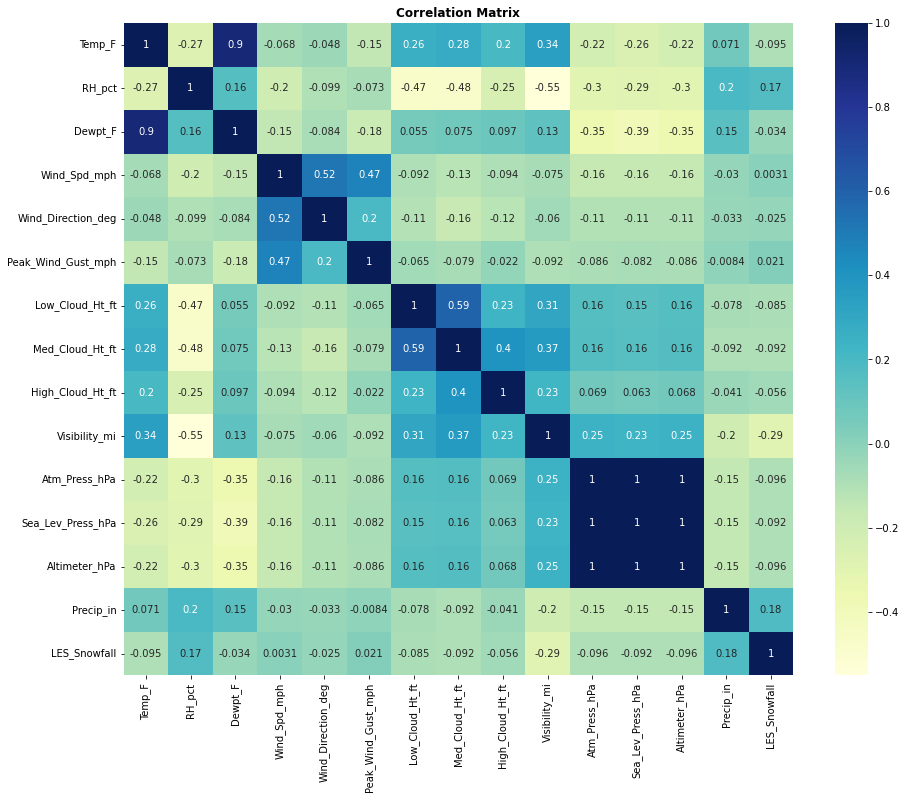

In [36]:
# Correlation
correlation_matrix = df_daytime_only.corr(method = 'pearson')
plt.subplots(figsize=(15,12))

# Heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu")
plt.title("Correlation Matrix", size = 12, weight = 'bold')

**Observations from the above correlation plots:**
- Few features are very heavily correated with each other (score >= 0.50)
    - **Temp_F** is highly correlated with **Dewpt_F**
    - **Wind_Spd_mph** is highly correlated with **Wind_Direction_deg**
    - **Atm_Press_hPa**, **Sea_Lev_Press_hPa**, and **Altimeter_hPa** are highly correlated to each other
- We also note some strong `negative correlation`, but all of them are greater than -0.5, hence we do not drop those features

We can drop the above columns since they imply to the same information, and keeping them as features will increase the model size.

But before doing this, let's work on **Atm_Press_hPa**, **Sea_Lev_Press_hPa**, and **Altimeter_hPa**, to see what is actually going on.

They are not identical to each other, but by nature, we know that they should be highly correlated. So, we are going to drop:

- **Dewpt_F**
- **Sea_Lev_Press_hPa** and **Altimeter_hPa**
    
We are being a little bit conservative here at the moment. The threshold for what constitutes "high" correlation can depend on the specific context and the dataset, but a common rule of thumb is to consider variables with a correlation coefficient above 0.8 or 0.9 to be highly correlated. However, there's no hard and fast rule, and the specific requirements of your project might necessitate a different threshold.

In [37]:
df_daytime_only = df_daytime_only.drop(['Dewpt_F', 'Sea_Lev_Press_hPa', 'Altimeter_hPa'], axis=1)
df_daytime_only = df_daytime_only.reset_index(drop=True)

# Information about dataset shape
print('Total observations: ', df_daytime_only.shape[0])
print('Total number of features: ', df_daytime_only.shape[1])
df_daytime_only.head()

Total observations:  16040
Total number of features:  15


,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Precip_in,LES_Snowfall
0,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...",48.0,92.0,0.0,0.0,0.0,3600.0,6500.0,6500.0,10.0,993.0,0.0,0.0
1,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...",55.0,59.0,11.0,300.0,11.0,3600.0,6500.0,6500.0,10.0,993.7,0.0,0.0
2,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...",55.0,61.0,10.0,300.0,10.0,3600.0,6500.0,6500.0,10.0,994.3,0.0,0.0
3,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...",58.0,55.0,8.0,290.0,8.0,3600.0,6500.0,6500.0,10.0,995.0,0.0,0.0
4,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...",56.0,59.0,10.0,260.0,10.0,3600.0,6500.0,6500.0,10.0,995.0,0.0,0.0


In [38]:
df_daytime_only['LES_Snowfall'].value_counts()

0.0    15696
1.0      344
Name: LES_Snowfall, dtype: int64

<Axes: xlabel='LES_Snowfall', ylabel='count'>

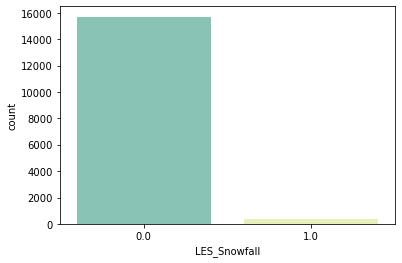

In [39]:
sns.countplot(x = df_daytime_only['LES_Snowfall'], palette=["#7fcdbb", "#edf8b1"])

---

# 5. Feature Engineering: Precipitation

### Adding a New Column For Precipitation

There is no fancy masking being applied yet. We will do that in another experiment.

In [40]:
df_daytime_only.loc[df_daytime_only['Precip_in'] > 0, 'LES_Precipitation'] = 1
df_daytime_only.loc[df_daytime_only['Precip_in'] <= 0, 'LES_Precipitation'] = 0
# df_daytime_only

<Axes: xlabel='LES_Precipitation', ylabel='count'>

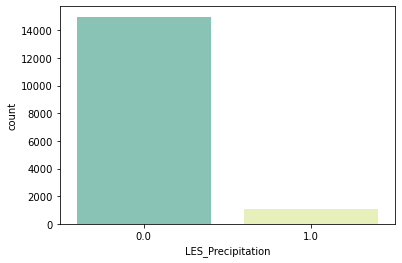

In [41]:
sns.countplot(x = df_daytime_only['LES_Precipitation'], palette=["#7fcdbb", "#edf8b1"])

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox

In [43]:
from tqdm import tqdm
import cv2

images = []
for idx in tqdm(range(df_daytime_only.shape[0])):
# for idx in tqdm(range(7)):
    # im shape -> (64, 64)
    im = cv2.imread('data_dir/lake-michigan-images-64/' + str(idx) + '.png')
    # Storing 1 channel, since the images are grayscale, and cropping
    images.append(im[8:-8,8:-8,0])
    # images shape -> (35, 64, 64)

100%|██████████| 16040/16040 [00:00<00:00, 18221.11it/s]


# 6. Predicting rain from past imagery *and* meteo

In this section, we will build the network with ConvLSTM2D for meteorological imagery data, 

In [44]:
meteo_les = df_single_station.drop(
    [ 'Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake', 'File_name_for_2D_lake',
     'Lake_data_1D', 'Dewpt_F', 'Sea_Lev_Press_hPa', 'Altimeter_hPa', 'data_usable', 'cloud_count',
       'cloud_exist' ], axis=1)

In [45]:
meteo_les.head()

,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Precip_in
0,51.0,92.0,0.0,0.0,0.0,3700.0,3700.0,3700.0,10.0,984.4,0.00
1,48.0,96.0,0.0,0.0,0.0,3700.0,3700.0,3700.0,10.0,984.7,0.00
2,49.0,92.0,3.0,220.0,3.0,3700.0,3700.0,3700.0,10.0,985.4,0.00
3,48.0,100.0,0.0,0.0,0.0,2500.0,6500.0,6500.0,6.0,986.0,0.02
4,50.0,92.0,3.0,180.0,3.0,7000.0,6500.0,6500.0,8.0,986.4,0.00


In [46]:
len(meteo_les)

48121

In [47]:
meteo_train_batched = tf.keras.preprocessing.timeseries_dataset_from_array(meteo_les[0:40500], None, sequence_length = 72, sequence_stride=24,
                                                                   sampling_rate=1, batch_size=40500)

In [48]:

for batch in meteo_train_batched:
    meteo_train = batch
    print(meteo_train.shape)
    print('--')

(1685, 72, 11)
--


Next, we load the validation portion.

In [49]:
meteo_val_batched = tf.keras.preprocessing.timeseries_dataset_from_array(meteo_les[40500:48000], None, sequence_length = 72, sequence_stride=24,
                                                                   sampling_rate=1, batch_size=7500)

In [50]:
meteo_val = None
for batch in meteo_val_batched:
    meteo_val = batch
    print(meteo_val.shape)
    print('--')

(310, 72, 11)
--


For the imagery data, $ 8 \times 3 \ = \ 24$ images per input sequence, and time step is 8 images.

In [51]:
cloud_train_batched = tf.keras.preprocessing.timeseries_dataset_from_array(images[:13500], None, 24, sequence_stride=8,
                                                                           sampling_rate=1, batch_size=13500)

In [52]:
cloud_train = None
for batch in cloud_train_batched:
    cloud_train = batch
    cloud_train = np.expand_dims(cloud_train, axis=-1)
    print(cloud_train.shape)
    cloud_train = cloud_train / 255
    print('--')

(1685, 24, 48, 48, 1)
--


And test data:

In [53]:
cloud_val_batched = tf.keras.preprocessing.timeseries_dataset_from_array(images[13500:16000], None, 24, sequence_stride=8,
                                                                         sampling_rate=1, batch_size=2500)

In [54]:
cloud_val = None
for batch in cloud_val_batched:
    cloud_val = batch
    cloud_val = np.expand_dims(cloud_val, axis=-1)
    print(cloud_val.shape)
    cloud_val = cloud_val / 255
    print('--')

(310, 24, 48, 48, 1)
--


### Final rain classification label
Finally, let's create our label:

This is how much precipitation in $72$ hours:

In [55]:
rain_train = []
for batch in meteo_train:
    batch =batch
    batch = np.expand_dims(batch, axis=0)
    for i in range(batch.shape[0]):
        rain_train.append(sum(batch[i,:,-1]))
#                rain_train.append(sum(batch[i,:,-1].numpy()))


len(rain_train)

1685

We use $0.10 \ inch$ over the span of 72 hours as the criteria.

In [56]:
rain_train_b = [1 if 0.10 <= r else 0 for r in rain_train]

In [57]:
rain_train_c = np.array(rain_train_b)
rain_train_c.shape

(1685,)

In [58]:
rain_val = []
for batch in meteo_val:
    batch = np.expand_dims(batch, axis=0)
    for i in range(batch.shape[0]):
        rain_val.append(sum(batch[i,:,-1]))


len(rain_val)

310

In [59]:
rain_val_b = [1 if 0.10 <= r else 0 for r in rain_val]

In [60]:
rain_val_c = np.array(rain_val_b)
rain_val_c.shape

(310,)

## Network
### Imagery Network

In [61]:
cloud_train.shape, rain_train_c.shape, cloud_val.shape, rain_val_c.shape

((1685, 24, 48, 48, 1), (1685,), (310, 24, 48, 48, 1), (310,))

In [62]:
cloud_train.shape[2:]

(48, 48, 1)

In our network, we will add the custom squeeze-excitation blocks.

In [63]:


from tensorflow.keras.layers import GlobalAveragePooling2D, Reshape, Dense, Multiply, TimeDistributed, Lambda



from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Dense, Reshape, Multiply
import tensorflow as tf

tf.config.optimizer.set_experimental_options({'layout_optimizer': False})

class SEBlock(Layer):
    def __init__(self, ratio=16, **kwargs):
        self.ratio = ratio
        super(SEBlock, self).__init__(**kwargs)

    def build(self, input_shape):
        self.channels = input_shape[-1]
        self.dense1 = self.add_weight(name='dense1', shape=(self.channels, self.channels // self.ratio),
                                      initializer='uniform', trainable=True)
        self.dense2 = self.add_weight(name='dense2', shape=(self.channels // self.ratio, self.channels),
                                      initializer='uniform', trainable=True)
        super(SEBlock, self).build(input_shape)

    def call(self, inputs):
        # Get the shape of the input
        shape_tensor = tf.shape(inputs)
        timesteps = shape_tensor[1]
        height = shape_tensor[2]
        width = shape_tensor[3]
        channels = shape_tensor[4]

        # Reshape the input tensor into (batch_size * timesteps, height, width, channels)
        reshaped_inputs = tf.reshape(inputs, (-1, height, width, channels))
        
        # Squeeze
        se_tensor = GlobalAveragePooling2D()(reshaped_inputs)
        se_tensor = tf.matmul(se_tensor, self.dense1)
        se_tensor = tf.nn.relu(se_tensor)
        se_tensor = tf.matmul(se_tensor, self.dense2)
        se_tensor = tf.nn.sigmoid(se_tensor)
        se_tensor = Reshape((1, 1, self.channels))(se_tensor)
        
        # Excite
        excited_reshaped_inputs = Multiply()([reshaped_inputs, se_tensor])

        # Reshape back to original shape
        output_tensor = tf.reshape(excited_reshaped_inputs, (-1, timesteps, height, width, channels))
        return output_tensor



This code defines a Squeeze-and-Excitation (SE) block, which is a component that can be added to convolutional neural networks (CNNs) to adaptively recalibrate channel-wise feature responses. The SE block is designed to allow the network to pay more selective attention to informative features during training.

The code includes the following steps:

1. Initialization (__init__ method):

ratio: A hyperparameter that controls the reduction dimension in the channel-wise squeeze operation.
The constructor initializes the ratio attribute and calls the parent class constructor.

2. Building the Block (build method):

It defines the structure of the SE block by adding trainable weights.
self.channels retrieves the number of channels from the input shape.
Two dense weight matrices self.dense1 and self.dense2 are created, representing two fully connected (dense) layers.
Calling the Block (call method): This method describes the forward computation of the block and includes the following steps:

    a. Extracting Dimensions:

    Extracts the shape of the input tensor, including timesteps, height, width, and channels.

    b. Reshaping the Input:

    Reshapes the input tensor to treat each time step as a separate example, forming a new tensor with shape (batch_size * timesteps, height, width, channels).

    c. Squeeze Operation:

    * Applies a Global Average Pooling layer to the reshaped inputs, reducing the spatial dimensions.
    * Multiplies the resulting tensor by the self.dense1 weights and applies a ReLU activation function.
    * Multiplies the resulting tensor by the self.dense2 weights and applies a sigmoid activation function.
    * Reshapes the tensor to have dimensions (1, 1, channels), preparing it for the excitation step.

    d. Excite Operation:

    Multiplies the reshaped inputs (from the squeeze operation) with the se_tensor (from the squeeze step), scaling the channels based on the information captured by the squeeze operation.

    e. Reshaping Back to Original Shape:

    Finally, the excited tensor is reshaped back to the original shape (batch_size, timesteps, height, width, channels).


Therefore, the SE block takes an input tensor and applies a "squeeze" operation to capture global information about each channel and then an "excitation" operation to re-weight the channels. It's particularly useful for enhancing the representational power of a CNN by allowing it to emphasize the most informative channels for a given task. The code provided is a modified version to work with sequences of 2D images (as might be used with ConvLSTM2D layers), extending the typical SE block to handle this additional time dimension.

In [64]:
# Construct the input layer with no definite frame size (None below could be replaced by 8)

from tensorflow.keras.layers import MultiHeadAttention
inp = layers.Input(shape=(None, *cloud_train.shape[2:]))
print("layers.Input(shape=", inp.shape)

# x = layers.ConvLSTM2D(
#     filters=64,
#     kernel_size=(5, 5),
#     strides=(2, 2),
#     padding="same",
#     return_sequences=True,
#     activation="relu",
# )(inp)
x = layers.ConvLSTM2D(
    filters=96,
    kernel_size=(9, 9),
    strides=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
# x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)
# x = layers.ConvLSTM2D(
#     filters=64,
#     kernel_size=(7, 7),
#     strides=(1, 1),
#     padding="same",
#     return_sequences=True,
#     activation="relu",
# # )(inp)
# )(x)
# Add the SE block here
# x = se_block(x)
x = SEBlock()(x)
# x = layers.SqueezeAndExciteBlock(64)(x)
# x = layers.Dropout(0.3)(x)
# x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(7, 7),
    strides=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
# )(inp)
)(x)
print("ConvLSTM2D filters=64, kernel_size=(5, 5), return_sequences=True", x.shape)

# x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)

print("BatchNormalization", x.shape)

# Save the shape before attention
shape_before_attention = tf.shape(x)
time_steps = shape_before_attention[1]
height_width_channels = shape_before_attention[2] * shape_before_attention[3] * shape_before_attention[4]

# Reshape for attention (flattening spatial dimensions)
x_flattened = tf.reshape(x, (-1, time_steps, height_width_channels))

# Apply MultiHeadAttention
attention = MultiHeadAttention(num_heads=2, key_dim=64)
x_attention = attention(x_flattened, x_flattened)

# Reshape back to original shape
x_after_attention = tf.reshape(x_attention, shape_before_attention)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    strides=(2, 2),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = SEBlock()(x)

x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    strides=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)

# Save the shape before attention
shape_before_attention = tf.shape(x)
time_steps = shape_before_attention[1]
height_width_channels = shape_before_attention[2] * shape_before_attention[3] * shape_before_attention[4]

# Reshape for attention (flattening spatial dimensions)
x_flattened = tf.reshape(x, (-1, time_steps, height_width_channels))

# Apply MultiHeadAttention
attention = MultiHeadAttention(num_heads=2, key_dim=64)
x_attention = attention(x_flattened, x_flattened)

# Reshape back to original shape
x_after_attention = tf.reshape(x_attention, shape_before_attention)

x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    strides=(2, 2),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
# x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)
x = SEBlock()(x)
x = layers.ConvLSTM2D(
    filters=32,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = SEBlock()(x)
# x = squeeze_excite_block(32,x)
print("ConvLSTM2D filters=64, kernel_size=(3, 3), return_sequences=True", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)

# Save the shape before attention
shape_before_attention = tf.shape(x)
time_steps = shape_before_attention[1]
height_width_channels = shape_before_attention[2] * shape_before_attention[3] * shape_before_attention[4]

# Reshape for attention (flattening spatial dimensions)
x_flattened = tf.reshape(x, (-1, time_steps, height_width_channels))

# Apply MultiHeadAttention
attention = MultiHeadAttention(num_heads=2, key_dim=64)
x_attention = attention(x_flattened, x_flattened)

# Reshape back to original shape
x_after_attention = tf.reshape(x_attention, shape_before_attention)
x = layers.ConvLSTM2D(
    filters=32,
    kernel_size=(1, 1),
    strides=(2, 2),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D filters=64, kernel_size=(1, 1), return_sequences=True", x.shape)
x = layers.Conv3D(
    filters=24, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)

print("Conv3D kernel_size=(3, 3, 3)", x.shape)
x = layers.ConvLSTM2D(
    filters=24,
    kernel_size=(1, 1),
    strides=(2, 2),
    padding="same",
    return_sequences=False,
    activation="relu",
)(x)
# x = layers.Dropout(0.3)(x)
print("ConvLSTM2D filters=1, kernel_size=(1, 1), return_sequences=False", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)

#x = layers.Dense(1)(x)
#print("Dense", x.shape)
x = GlobalAveragePooling2D()(x)
print("GlobalAveragePooling2D", x.shape)

layers.Input(shape= (None, None, 48, 48, 1)
ConvLSTM2D filters=64, kernel_size=(5, 5), return_sequences=True (None, None, 48, 48, 64)
BatchNormalization (None, None, 48, 48, 64)
ConvLSTM2D filters=64, kernel_size=(3, 3), return_sequences=True (None, None, 12, 12, 32)
BatchNormalization (None, None, 12, 12, 32)
ConvLSTM2D filters=64, kernel_size=(1, 1), return_sequences=True (None, None, 6, 6, 32)
Conv3D kernel_size=(3, 3, 3) (None, None, 6, 6, 24)
ConvLSTM2D filters=1, kernel_size=(1, 1), return_sequences=False (None, 3, 3, 24)
BatchNormalization (None, 3, 3, 24)
GlobalAveragePooling2D (None, 24)


### Meteo network

In [65]:
meteo_train.shape, rain_train_c.shape, meteo_val.shape, rain_val_c.shape

(TensorShape([1685, 72, 11]), (1685,), TensorShape([310, 72, 11]), (310,))

In [66]:
meteo_train.shape[1:]

TensorShape([72, 11])

In [67]:
# RNN = layers.LSTM
# hidden_size = 8
# data_shape = (24, 11)
# data = layers.Input(shape= data_shape)
# meteo_inp = layers.Input(shape=(None, *meteo_train.shape[1:]))
# print("layers.Input(shape=", meteo_inp.shape)
# lstm1 = RNN(hidden_size, input_shape=(24, data_shape[1]), return_sequences= True)(data)
# lstm2 = RNN(hidden_size, input_shape=(24, hidden_size), return_sequences= False)(lstm1)
# lstm2.shape

In [68]:
# RNN = layers.LSTM
# hidden_size = 24
# data_shape = (72, 11)
# data = layers.Input(shape= data_shape)
# meteo_inp = layers.Input(shape=(None, *meteo_train.shape[1:]))
# print("layers.Input(shape=", meteo_inp.shape)
# print(data_shape[1])
# lstm1 = RNN(hidden_size, input_shape=(48, data_shape[1]), return_sequences= True)(data)
# lstm2 = RNN(hidden_size, input_shape=(48, hidden_size), return_sequences= False)(lstm1)
# lstm2.shape

In [69]:
from tensorflow.keras.layers import Add

from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout, BatchNormalization

# from tensorflow.keras.layers import Add

RNN = layers.LSTM
hidden_size = 24
data_shape = (72, 11)

data = layers.Input(shape=data_shape)
meteo_inp = layers.Input(shape=(None, *meteo_train.shape[1:]))
print("layers.Input(shape=", meteo_inp.shape)

lstm1 = Bidirectional(RNN(hidden_size, return_sequences=True))(data)

lstm2 = Bidirectional(RNN(hidden_size, return_sequences=True))(lstm1)
lstm2 = Add()([lstm1, lstm2]) # Residual connection

lstm3 = Bidirectional(RNN(hidden_size, return_sequences=True))(lstm2)
lstm3 = Add()([lstm2, lstm3]) # Residual connection

lstm4 = Bidirectional(RNN(hidden_size, return_sequences=True))(lstm3)
lstm4 = Add()([lstm3, lstm4]) # Residual connection

lstm5 = Bidirectional(RNN(hidden_size, return_sequences=False))(lstm4)

# Continue to build the rest of your model


layers.Input(shape= (None, None, 72, 11)


### Imagery + meteo
Our final classification into rain or no rain, based on a balanced amount of information from both imagery and meteo:

In [70]:
# Flatten the output of CNN
#flattened = layers.Flatten()(conv6)

# Connect the CNN output and RNN output to a dense layer with 1 neuron for final 0/1 outputs
final = layers.Concatenate(axis=1)([lstm5, x])
print("layers.Concatenate(axis=1)([lstm5, x])", final.shape)
out = layers.Dense(1, activation='sigmoid')(final)
print("layers.Dense(1)", out.shape)

layers.Concatenate(axis=1)([lstm5, x]) (None, 72)
layers.Dense(1) (None, 1)


In [71]:
# Using both, images and numerical data as input
#inp = layers.Input(shape=(None, *cloud_train.shape[2:]))
#data = layers.Input(shape= (24, 11))
model = keras.models.Model([inp, data], out)
#model = keras.models.Model(inp, x)

# Build model
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 48, 4  0           []                               
                                8, 1)]                                                            
                                                                                                  
 conv_lstm2d (ConvLSTM2D)       (None, None, 48, 48  3017472     ['input_1[0][0]']                
                                , 96)                                                             
                                                                                                  
 batch_normalization (BatchNorm  (None, None, 48, 48  384        ['conv_lstm2d[0][0]']            
 alization)                     , 96)                                                         

## Training

In [72]:
cloud_train.shape, meteo_train.shape

((1685, 24, 48, 48, 1), TensorShape([1685, 72, 11]))

In [73]:
# Define some callbacks to improve training
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=20)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=15)

# Define modifiable training hyperparameters
epochs = 100
batch_size = 16

from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Started training at", current_time)

# Fit the model to the training data
history = model.fit(
    [cloud_train, meteo_train],
    rain_train_c,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=([cloud_val, meteo_val], rain_val_c),
    # callbacks=[early_stopping, reduce_lr],
    callbacks=[reduce_lr],
)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Finished training at", current_time)


Started training at 11:38:02
Epoch 1/100
106/106 [==============================] - 160s 1s/step - loss: 0.6403 - accuracy: 0.6380 - val_loss: 0.7970 - val_accuracy: 0.6194 - lr: 0.0010
Epoch 2/100
106/106 [==============================] - 122s 1s/step - loss: 0.6072 - accuracy: 0.6475 - val_loss: 0.6799 - val_accuracy: 0.5774 - lr: 0.0010
Epoch 3/100
106/106 [==============================] - 121s 1s/step - loss: 0.6065 - accuracy: 0.6546 - val_loss: 0.6878 - val_accuracy: 0.5355 - lr: 0.0010
Epoch 4/100
106/106 [==============================] - 120s 1s/step - loss: 0.5967 - accuracy: 0.6712 - val_loss: 0.7161 - val_accuracy: 0.5935 - lr: 0.0010
Epoch 5/100
106/106 [==============================] - 120s 1s/step - loss: 0.5846 - accuracy: 0.6849 - val_loss: 0.6545 - val_accuracy: 0.5968 - lr: 0.0010
Epoch 6/100
106/106 [==============================] - 120s 1s/step - loss: 0.5745 - accuracy: 0.6932 - val_loss: 0.6739 - val_accuracy: 0.6032 - lr: 0.0010
Epoch 7/100
106/106 [=======



Let's look at accuracy:

In [74]:
cloud_val.shape, tf.convert_to_tensor(cloud_val).shape, meteo_val.shape

((310, 24, 48, 48, 1),
 TensorShape([310, 24, 48, 48, 1]),
 TensorShape([310, 72, 11]))

In [75]:
# Select a random example from the cloud imagery validation dataset
# This approach didn't work initially
example_index = np.random.choice(range(len(cloud_val)), size=1)[0]
print("Picked index", example_index,"from validation dataset.")
example_clouds = tf.convert_to_tensor(cloud_val[example_index]) # all 8 frames from the example

# Select the same example from the meteo validation dataset
example_meteo = meteo_val[example_index]

# input
#np.expand_dims([example_clouds, example_meteo], axis=0)
# [example_clouds, example_meteo]

Picked index 284 from validation dataset.


In [76]:
# pred_input_combo = np.expand_dims([example_clouds, example_meteo], axis = 0)

In [77]:
# pred_input_combo = np.array(pred_input_combo, dtype=object)

In [78]:
# tf.convert_to_tensor(pred_input_combo, dtype=tf.float32)

In [79]:
# model.predict(pred_input_combo)

In [80]:
pred = model([cloud_val, meteo_val])

# Convert to array
pred = np.array(pred)

# Assigning class based on prediction
pred[pred >= 0.5] = 1
pred[pred < 0.5] = 0
#pred[pred != 1] = 0

# Class-wise accuracy
classwise1 = ((np.array(pred)[:,0] == np.array(rain_val_c))*(rain_val_c==1)).sum()/(rain_val_c==1).sum()
classwise0 = ((np.array(pred)[:,0] == np.array(rain_val_c))*(rain_val_c==0)).sum()/(rain_val_c==0).sum()

In [81]:
print(f'Total Accuracy: \t {((np.array(pred)[:,0] == np.array(rain_val_c)).sum()/len(pred))*100:.3f}')
print('-'*30)
print('--Class wise Accuracy of Test--')
print('-'*30)
print(f'Class 0: \t {classwise0*100:.3f}')
print(f'Class 1: \t {classwise1*100:.3f}')

######################################

#Note: Class 0: Non-LES Precip
#    Class 1: LES Precip

Total Accuracy: 	 81.290
------------------------------
--Class wise Accuracy of Test--
------------------------------
Class 0: 	 84.091
Class 1: 	 77.612


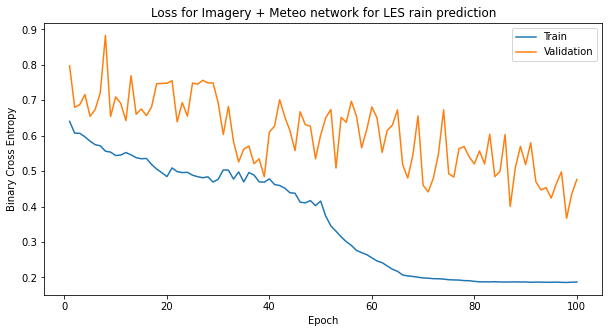

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_loss'], label='Validation')
plt.plot(history.history['loss'], label='Train')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Loss for Imagery + Meteo network for LES rain prediction')

In [83]:
plt.savefig('data_dir/Losses-imagery-and-meteo-LES-rain-prediction-72-'+station_code+'.png')

<Figure size 432x288 with 0 Axes>

In [84]:
print('Done')

Done


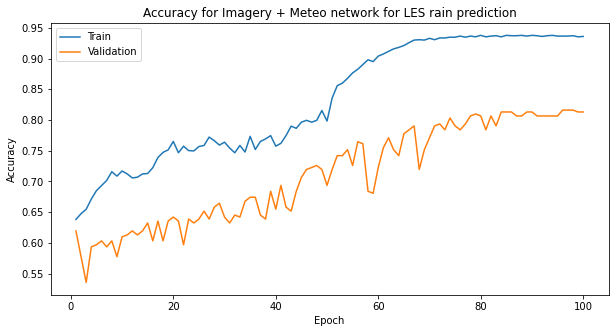

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(history.history['accuracy'], label='Train')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy for Imagery + Meteo network for LES rain prediction')

In [86]:
rain_val_series = pd.Series(rain_val_c)
value_counts = rain_val_series.value_counts()
value_counts


0    176
1    134
dtype: int64

